In [5]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Load dataset
#split into input (X) and output (y)
X = np.linspace(2,100,50) #This gives 5 to 100 as the instances of feature.
X = X*1.0 #convert to float

y = X**(1/7) #This gives us the exact answer, the instances of target.

X = X.reshape(-1, 1)
'''
Gives the correct shape, (var,1), instead of linspace's (var,)
Otherwise, the plotting does not occur correctly
'''
y = y.reshape(-1, 1)

#define keras model
model = Sequential()

model.add(Dense(8,input_dim=1,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 509 (1.99 KB)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340 (1.33 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[2.0] => 1.11 (expected 1.10)
[4.0] => 1.22 (expected 1.22)
[6.0] => 1.33 (expected 1.29)
[8.0] => 1.36 (expected 1.35)
[10.0] => 1.39 (expected 1.39)
[12.0] => 1.41 (expected 1.43)
[14.0] => 1.44 (expected 1.46)
[16.0] => 1.47 (expected 1.49)
[18.0] => 1.49 (expected 1.51)
[20.0] => 1.52 (expected 1.53)


<ipython-input-5-be251da277ef>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


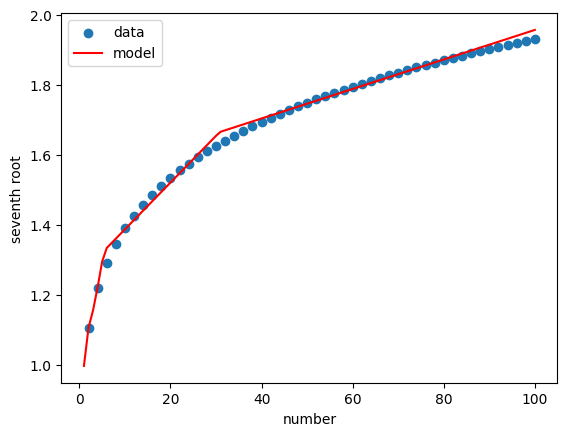

In [6]:
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('seventh root')
plt.legend()